In [1]:
#install folium (must restart kernel after this line)
!conda install -c conda-forge folium --yes
!pip install folium 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-0.25.3              |   py36hb3f55d8_0        11.4 MB  conda-forge
    tbb4py-2019.9              |   py36hc9558a2_0         245 KB  conda-forge
    folium-0.10.0              |             py_0          59 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        11.7 MB

The following NEW packages will be INSTALLED:

    tbb:    2019.9-hc9558a2_0     conda-forge
    tbb4py: 2019.9-py36hc9558a2_0 conda-forge

The following packag

In [2]:
#import needed libraries
import numpy as np 
import pandas as pd
import folium
import requests 

# Mapping Suburbs and House Prices

In [62]:
#import postcode data

!wget --quiet 'https://raw.githubusercontent.com/stephenmelita/Coursera_Capstone/master/Australian_Post_Codes_Lat_Lon.csv' -O Australian_Post_Codes_Lat_Lon.csv
df = pd.read_csv(r'Australian_Post_Codes_Lat_Lon.csv')

df.drop(columns=["dc","type"],inplace = True)
df.rename(columns={"lon":"Longitude","lat":"Latitude","postcode":"Postcode","suburb":"Suburb","state":"State"},inplace=True)
df=df[df["State"]=="VIC"]
df=df[df["Longitude"]!=0]
df=df[df["Latitude"]!=0]
df = df.groupby(['Postcode','Latitude',"Longitude"])['Suburb'].apply(', '.join).reset_index()

print(df.shape)
df.head(5)

(3151, 4)


,Postcode,Latitude,Longitude,Suburb
0,3000,-37.814563,144.970267,MELBOURNE
1,3001,-38.365017,144.765920,MELBOURNE
2,3002,-37.816640,144.987811,EAST MELBOURNE
3,3003,-37.806255,144.941123,WEST MELBOURNE
4,3004,-37.837324,144.976335,MELBOURNE


In [63]:
#import remoteness data
!wget --quiet 'https://raw.githubusercontent.com/stephenmelita/Coursera_Capstone/master/remoteness2.csv' -O remoteness2.csv
rem = pd.read_csv(r'remoteness2.csv')

rem.rename(columns={"POSTCODE":"Postcode"},inplace=True)
print(rem.shape)
rem.head(5)

(2662, 5)


,Postcode,Remoteness_Code,Remoteness_Name,RATIO,PERCENTAGE
0,800,72,Outer Regional Australia,1.0,100.0
1,810,72,Outer Regional Australia,1.0,100.0
2,812,72,Outer Regional Australia,1.0,100.0
3,820,72,Outer Regional Australia,1.0,100.0
4,828,72,Outer Regional Australia,1.0,100.0


In [64]:
#merge postcode and remoteness data

df=df.merge(rem, on='Postcode',how='right')

print(df.shape)
df.head(5)

(5067, 8)


,Postcode,Latitude,Longitude,Suburb,Remoteness_Code,Remoteness_Name,RATIO,PERCENTAGE
0,3000,-37.814563,144.970267,MELBOURNE,20,Major Cities of Australia,1.0,100.0
1,3002,-37.816640,144.987811,EAST MELBOURNE,20,Major Cities of Australia,1.0,100.0
2,3003,-37.806255,144.941123,WEST MELBOURNE,20,Major Cities of Australia,1.0,100.0
3,3004,-37.837324,144.976335,MELBOURNE,20,Major Cities of Australia,1.0,100.0
4,3005,-37.822262,144.954856,WORLD TRADE CENTRE,20,Major Cities of Australia,1.0,100.0


In [65]:
#import house price data

!wget --quiet "https://raw.githubusercontent.com/stephenmelita/Coursera_Capstone/master/MedianHouse-1st-QTR2019.csv" -O price.csv
price = pd.read_csv(r"price.csv")
price.rename(columns={"SUBURB":"Suburb"},inplace=True)

print(price.shape)
price.head(5)

(771, 6)


,Suburb,Median House Prices Jan - Mar 18,Median House Prices Apr- Jun 18,Median House Prices Jul - Sep 18,Median House Prices Oct - Dec 18,Median House Prices Jan - Mar 19
0,ABBOTSFORD,1220000,1135000.0,1205000.0,1185000.0,1015000.0
1,ABERFELDIE,1627500,1500000.0,1607500.0,1380500.0,1410000.0
2,AINTREE,611000,630000.0,635000.0,563500.0,580000.0
3,AIREYS INLET,788000,1010000.0,884500.0,815000.0,885000.0
4,AIRPORT WEST,870000,857500.0,872500.0,792500.0,690000.0


In [66]:
# merge house price data with the existing data

df=df.merge(price, on='Suburb',how='left')
print(df.shape)
df.head(5)

(5067, 13)


,Postcode,Latitude,Longitude,Suburb,Remoteness_Code,Remoteness_Name,RATIO,PERCENTAGE,Median House Prices Jan - Mar 18,Median House Prices Apr- Jun 18,Median House Prices Jul - Sep 18,Median House Prices Oct - Dec 18,Median House Prices Jan - Mar 19
0,3000,-37.814563,144.970267,MELBOURNE,20,Major Cities of Australia,1.0,100.0,NaN,NaN,NaN,NaN,NaN
1,3002,-37.816640,144.987811,EAST MELBOURNE,20,Major Cities of Australia,1.0,100.0,4268000,1680000.0,2250000.0,2400000.0,2830000.0
2,3003,-37.806255,144.941123,WEST MELBOURNE,20,Major Cities of Australia,1.0,100.0,1326000,1400000.0,1265000.0,1459800.0,940500.0
3,3004,-37.837324,144.976335,MELBOURNE,20,Major Cities of Australia,1.0,100.0,NaN,NaN,NaN,NaN,NaN
4,3005,-37.822262,144.954856,WORLD TRADE CENTRE,20,Major Cities of Australia,1.0,100.0,NaN,NaN,NaN,NaN,NaN


In [67]:
# remove NaNs

df = df.dropna()
print(df.shape)
df.head()

(714, 13)


,Postcode,Latitude,Longitude,Suburb,Remoteness_Code,Remoteness_Name,RATIO,PERCENTAGE,Median House Prices Jan - Mar 18,Median House Prices Apr- Jun 18,Median House Prices Jul - Sep 18,Median House Prices Oct - Dec 18,Median House Prices Jan - Mar 19
1,3002,-37.816640,144.987811,EAST MELBOURNE,20,Major Cities of Australia,1.0,100.0,4268000,1680000.0,2250000.0,2400000.0,2830000.0
2,3003,-37.806255,144.941123,WEST MELBOURNE,20,Major Cities of Australia,1.0,100.0,1326000,1400000.0,1265000.0,1459800.0,940500.0
8,3011,-37.808769,144.895486,SEDDON,20,Major Cities of Australia,1.0,100.0,1076000,1052000.0,1035000.0,990000.0,970000.0
9,3011,-37.799770,144.899587,FOOTSCRAY,20,Major Cities of Australia,1.0,100.0,931000,915000.0,880000.0,845500.0,784800.0
11,3012,-37.814624,144.847108,BROOKLYN,20,Major Cities of Australia,1.0,100.0,700000,840000.0,640000.0,683000.0,625000.0


In [68]:
#filter for metropolitan melbourne

df=df[df["Remoteness_Code"]==20]
df = df.dropna()
df.reset_index(inplace=True,drop=True)
print(df.shape)
df.head()

(385, 13)


,Postcode,Latitude,Longitude,Suburb,Remoteness_Code,Remoteness_Name,RATIO,PERCENTAGE,Median House Prices Jan - Mar 18,Median House Prices Apr- Jun 18,Median House Prices Jul - Sep 18,Median House Prices Oct - Dec 18,Median House Prices Jan - Mar 19
0,3002,-37.816640,144.987811,EAST MELBOURNE,20,Major Cities of Australia,1.0,100.0,4268000,1680000.0,2250000.0,2400000.0,2830000.0
1,3003,-37.806255,144.941123,WEST MELBOURNE,20,Major Cities of Australia,1.0,100.0,1326000,1400000.0,1265000.0,1459800.0,940500.0
2,3011,-37.808769,144.895486,SEDDON,20,Major Cities of Australia,1.0,100.0,1076000,1052000.0,1035000.0,990000.0,970000.0
3,3011,-37.799770,144.899587,FOOTSCRAY,20,Major Cities of Australia,1.0,100.0,931000,915000.0,880000.0,845500.0,784800.0
4,3012,-37.814624,144.847108,BROOKLYN,20,Major Cities of Australia,1.0,100.0,700000,840000.0,640000.0,683000.0,625000.0


In [69]:
# create map using latitude and longitude values

!pip install  geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Melbourne'

try:
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
except:
    latitude = -37.8142176
    longitude = 144.9631608  

print("The geographical coordinates of", address, 'are {}, {}.'.format(latitude, longitude))



mapmel = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Suburb']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FF69B4',
        fill_opacity=0.7,
        parse_html=False).add_to(mapmel)
    #print(neighborhood)
    
mapmel

The geographical coordinates of Melbourne are -37.8142176, 144.9631608.


In [70]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json

In [71]:
#load the geojson fle for Melbourne's inner suburbs - this had to be manually edited as aailable Australian postcode geoJSON files were too many polygons for the notebook to handle

!wget --quiet 'https://raw.githubusercontent.com/stephenmelita/Coursera_Capstone/master/VIC%20NEW.geojson' -O melb2.json
geo = r'melb2.json'


#create choropleth map

melbourne_cho = folium.Map(location=[latitude, longitude], zoom_start=10, Tiles = "Mapbox Bright")

folium.Choropleth(
    geo_data=geo,
    data=df,
    columns=['Suburb', 'Median House Prices Jan - Mar 19'],
    key_on='feature.properties.vic_loca_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_opacity =0,
    legend_name='Median House Prices Jan - Mar 19'
).add_to(melbourne_cho)

melbourne_cho

# Distance to Melbourne vs Price

In [72]:
# Define a function to calculate the great circle distance (in km) between two points on the earth

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):

    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))



# Add a column for the distance for each suburb to Melbourne

df["LATMelb"] = latitude
df["LONGMelb"]= longitude

df["Distance to Melbourne"] = haversine(df["Latitude"],df["Longitude"],df["LATMelb"],df["LONGMelb"])

df.drop(columns=["LATMelb","LONGMelb"], inplace=True)

df.head()

,Postcode,Latitude,Longitude,Suburb,Remoteness_Code,Remoteness_Name,RATIO,PERCENTAGE,Median House Prices Jan - Mar 18,Median House Prices Apr- Jun 18,Median House Prices Jul - Sep 18,Median House Prices Oct - Dec 18,Median House Prices Jan - Mar 19,Distance to Melbourne
0,3002,-37.816640,144.987811,EAST MELBOURNE,20,Major Cities of Australia,1.0,100.0,4268000,1680000.0,2250000.0,2400000.0,2830000.0,2.182034
1,3003,-37.806255,144.941123,WEST MELBOURNE,20,Major Cities of Australia,1.0,100.0,1326000,1400000.0,1265000.0,1459800.0,940500.0,2.128856
2,3011,-37.808769,144.895486,SEDDON,20,Major Cities of Australia,1.0,100.0,1076000,1052000.0,1035000.0,990000.0,970000.0,5.975857
3,3011,-37.799770,144.899587,FOOTSCRAY,20,Major Cities of Australia,1.0,100.0,931000,915000.0,880000.0,845500.0,784800.0,5.811597
4,3012,-37.814624,144.847108,BROOKLYN,20,Major Cities of Australia,1.0,100.0,700000,840000.0,640000.0,683000.0,625000.0,10.194650


In [73]:
#show correlation between house price and distance to melbourne

df[["Median House Prices Jan - Mar 19","Distance to Melbourne"]].corr()

,Median House Prices Jan - Mar 19,Distance to Melbourne
Median House Prices Jan - Mar 19,1.000000,-0.472618
Distance to Melbourne,-0.472618,1.000000


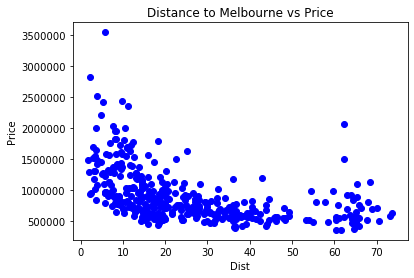

In [74]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#Plot distance to melbourne against price and check correlation
plt.plot(df["Distance to Melbourne"], df["Median House Prices Jan - Mar 19"], 'bo')
plt.xlabel('Dist')
plt.ylabel('Price')
plt.title('Distance to Melbourne vs Price')
plt.show()

In [75]:
#Define train and test sets for price and distance regression

msk = np.random.rand(len(df)) < 0.8

df2 = df.sort_values(by = "Distance to Melbourne")

train = df2[msk]
test = df2[~msk]
print(train.shape)
print(test.shape)

#Split train and test
train_x = np.asanyarray(train[["Distance to Melbourne"]])
train_y = np.asanyarray(train[["Median House Prices Jan - Mar 19"]])

test_x = np.asanyarray(test[["Distance to Melbourne"]])
test_y = np.asanyarray(test[["Median House Prices Jan - Mar 19"]])

(304, 14)
(81, 14)


Train Data:
Coefficients:  [[-11269.45031909]]
Intercept:  [1200970.43359469]
Mean absolute error: 276091.47
Residual sum of squares (MSE): 149105072301.40
R2-score (train): 0.22
  
Test Data:
Mean absolute error: 269783.74
Residual sum of squares (MSE): 117531255091.75
R2-score (test): 0.22


Text(0.5, 1.0, 'Distance to Melbourne vs Price')

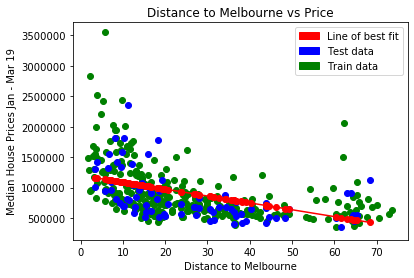

In [76]:
import matplotlib.patches as mpatches
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

# Run linear regression on the train and test data
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
train_y_ = regr.predict(train_x)
test_y_ = regr.predict(test_x)

print('Train Data:')
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y - train_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y - train_y_) ** 2))
print("R2-score (train): %.2f" % r2_score(train_y , train_y_) )
print('  ')

print('Test Data:')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-score (test): %.2f" % r2_score(test_y , test_y_) )

plt.scatter(train_x, train_y,  color='green')
plt.scatter(test_x, test_y,  color='blue')
plt.scatter(test_x, test_y_, color='red' )
plt.plot(test_x, test_y_, color='red' )

red_patch = mpatches.Patch(color='red', label="Line of best fit")
green_patch = mpatches.Patch(color='green', label="Train data")
blue_patch = mpatches.Patch(color='blue', label="Test data")
plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.xlabel("Distance to Melbourne")
plt.ylabel("Median House Prices Jan - Mar 19")
plt.title('Distance to Melbourne vs Price')

Train Data:
Coefficients:  [[     0.         -44459.61780876    481.74478014]]
Intercept:  [1572817.25302619]
Mean absolute error: 244237.25
Residual sum of squares (MSE): 122418372226.05
R2-score (train): 0.36
  
Test Data:
Mean absolute error: 227879.11
Residual sum of squares (MSE): 94867144840.90
R2-score (test): 0.37


Text(0.5, 1.0, 'Distance to Melbourne vs Price')

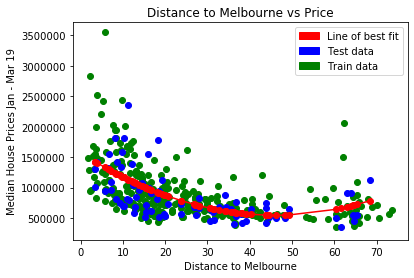

In [77]:
#Run polynomial regression on the test data

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)
train_y_ = regr.predict(train_x_poly)

test_x_poly = poly.fit_transform(test_x)
test_y_ = regr.predict(test_x_poly)

print('Train Data:')
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y - train_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y - train_y_) ** 2))
print("R2-score (train): %.2f" % r2_score(train_y , train_y_) )
print('  ')

print('Test Data:')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-score (test): %.2f" % r2_score(test_y , test_y_) )

plt.scatter(train_x, train_y,  color='green')
plt.scatter(test_x, test_y,  color='blue')
plt.scatter(test_x, test_y_, color='red' )
plt.plot(test_x, test_y_, color='red' )

red_patch = mpatches.Patch(color='red', label="Line of best fit")
green_patch = mpatches.Patch(color='green', label="Train data")
blue_patch = mpatches.Patch(color='blue', label="Test data")
plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.xlabel("Distance to Melbourne")
plt.ylabel("Median House Prices Jan - Mar 19")
plt.title('Distance to Melbourne vs Price')

All Data:
Coefficients:  [[     0.         -44092.64807364    479.72283127]]
Intercept:  [1556788.51308236]
Mean absolute error: 239506.14
Residual sum of squares (MSE): 116528964553.21
R2-score : 0.36
  


Text(0.5, 1.0, 'Distance to Melbourne vs Price')

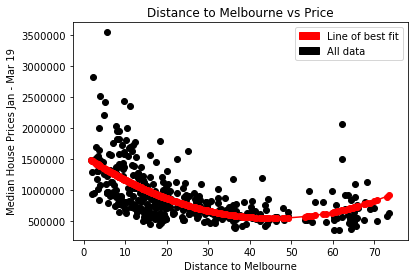

In [78]:
#Run polynomial regression on ALL data

x = np.asanyarray(df2[["Distance to Melbourne"]])
y = np.asanyarray(df2[["Median House Prices Jan - Mar 19"]])


poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

regr = linear_model.LinearRegression()
regr.fit(x_poly,y)
y_ = regr.predict(x_poly)

print('All Data:')
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y - y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y - y_) ** 2))
print("R2-score : %.2f" % r2_score(y , y_) )
print('  ')


plt.scatter(x, y,  color='black')
plt.scatter(x, y_, color='red' )
plt.plot(x, y_, color='red' )

red_patch = mpatches.Patch(color='red', label="Line of best fit")
black_patch = mpatches.Patch(color='black', label="All data")
plt.legend(handles=[red_patch,black_patch])

plt.xlabel("Distance to Melbourne")
plt.ylabel("Median House Prices Jan - Mar 19")
plt.title('Distance to Melbourne vs Price')

Text(0.5, 1.0, 'Residuals')

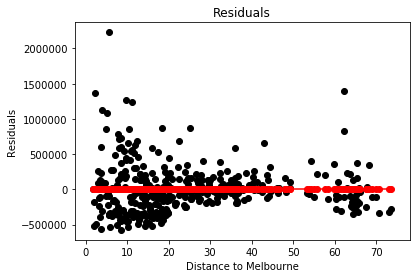

In [79]:
plt.scatter(x, y-y_,  color='black')
plt.plot(x, y-y, color='red' )
plt.scatter(x, y-y, color='red' )

plt.xlabel("Distance to Melbourne")
plt.ylabel("Residuals")
plt.title('Residuals')

# Venues Data

In [80]:
# Code to load up the venues data which we saved (can skip the above cell if we have exhausted our limit of Foursqaure API calls)

!wget --quiet "https://raw.githubusercontent.com/stephenmelita/Coursera_Capstone/master/venues.csv" -O venues.csv
venues = pd.read_csv(r"venues.csv")
print(venues.shape)
venues.head()

(4198, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,EAST MELBOURNE,-37.81664,144.987811,Hard Pressed,-37.816612,144.987549,Café
1,EAST MELBOURNE,-37.81664,144.987811,The Tippler & Co,-37.816510,144.988240,Wine Bar
2,EAST MELBOURNE,-37.81664,144.987811,Yarra Park,-37.819311,144.986637,Park
3,EAST MELBOURNE,-37.81664,144.987811,Krua Thai 2 Restaurant,-37.817631,144.991231,Thai Restaurant
4,EAST MELBOURNE,-37.81664,144.987811,Fifty Acres,-37.817798,144.992229,Breakfast Spot


In [81]:
#Examine the most popular venues categories in Melbourne
melbourneexamine=venues.groupby("Venue Category").count().reset_index()
melbourneexamine=melbourneexamine[["Venue Category","Venue"]].rename(columns={"Venue":"Venue Count"}).sort_values(by = "Venue Count",ascending=False)
melbourneexamine=melbourneexamine.reset_index(drop=True)
melbourneexamine.head(15)

,Venue Category,Venue Count
0,Café,553
1,Pizza Place,154
2,Supermarket,135
3,Grocery Store,134
4,Bakery,123
5,Fast Food Restaurant,120
6,Thai Restaurant,93
7,Coffee Shop,87
8,Train Station,84
9,Pub,79


In [82]:
#One-hot encode the venue types, and aggregate by suburb
venuedumm = pd.get_dummies(venues['Venue Category'])
venuedumm['Suburb']=venues['Suburb']
venuedumm = venuedumm.groupby('Suburb').mean().reset_index()
print(venuedumm.shape)
venuedumm.head()

(364, 298)


,Suburb,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,ABBOTSFORD,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,ABERFELDIE,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,AIRPORT WEST,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,ALBANVALE,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,ALBERT PARK,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.037037,...,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0


In [83]:
#Examine the top (X) venue categories in each suburb

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
topX = pd.DataFrame(columns=columns)
topX['Suburb'] = venuedumm['Suburb']

# Return up to the top X venue types for each suburb

#Loop for number of suburbs
for ind in np.arange(venuedumm.shape[0]): 
    #Create a dataframe which sorts venue types for each suburb from most common to least
    TOP = venues[venues["Suburb"]==venuedumm.iloc[ind,0]].groupby("Venue Category").count().sort_values(by="Suburb",ascending=False).reset_index()[["Venue Category","Suburb"]]
    #figure out whether there are enough venue types for the suburb
    number = min(num_top_venues,TOP.shape[0])
    #loop through and return the most common types
    for XX in range(0,number):
        topX.iloc[ind, XX+1] =  TOP.iloc[XX,0]
                
print(topX.shape)
topX.head(5)

(364, 11)


,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBOTSFORD,Café,Pub,Thrift / Vintage Store,Antique Shop,Harbor / Marina,Train Station,Sporting Goods Shop,Rock Climbing Spot,Pizza Place,Japanese Restaurant
1,ABERFELDIE,Café,Grocery Store,Pizza Place,Tennis Court,Thai Restaurant,NaN,NaN,NaN,NaN,NaN
2,AIRPORT WEST,Café,Department Store,Supermarket,Electronics Store,Fast Food Restaurant,Moving Target,Sporting Goods Shop,Shopping Mall,Sandwich Place,Portuguese Restaurant
3,ALBANVALE,Furniture / Home Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALBERT PARK,Café,Italian Restaurant,Asian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Steakhouse,Shopping Mall,Seafood Restaurant,Restaurant


# Number of Cafes vs Price

In [84]:
cafe = venues[["Suburb","Venue Category","Venue"]]
cafe = cafe.groupby(["Suburb","Venue Category"]).count()
cafe.reset_index(inplace=True)
cafe1 = cafe[["Suburb","Venue"]][cafe["Venue Category"]=="Café"]
cafe2 = cafe[["Suburb","Venue"]][cafe["Venue Category"]=="Coffee Shop"]
cafe = cafe1.append(cafe2)
cafe = cafe.groupby(["Suburb"]).sum()
cafe.rename(columns={"Venue":"Number of Cafes"},inplace=True)
cafe.reset_index(inplace=True)
cafe=cafe.merge(df[["Suburb","Median House Prices Jan - Mar 18","Median House Prices Apr- Jun 18","Median House Prices Jul - Sep 18","Median House Prices Oct - Dec 18","Median House Prices Jan - Mar 19"]].set_index('Suburb'), on='Suburb')
cafe.sort_values(by = "Number of Cafes", ascending = False, inplace = True)
cafe.head(5)

,Suburb,Number of Cafes,Median House Prices Jan - Mar 18,Median House Prices Apr- Jun 18,Median House Prices Jul - Sep 18,Median House Prices Oct - Dec 18,Median House Prices Jan - Mar 19
167,SOUTH YARRA,18,2205000,1960000.0,2296900.0,1600000.0,1642000.0
154,PRAHRAN,16,1687500,1420000.0,1550000.0,1564000.0,1455000.0
53,COLLINGWOOD,13,1253000,1050000.0,1062500.0,1160000.0,957500.0
135,MOONEE PONDS,12,1502500,1390000.0,1300000.0,1295000.0,1125000.0
9,BALACLAVA,11,1395000,1325000.0,1049000.0,1085000.0,1125000.0


In [85]:
msk = np.random.rand(len(cafe)) < 0.8

train = cafe[msk]
test = cafe[~msk]
print(train.shape)
print(test.shape)

#Split train and test
train_x = np.asanyarray(train[["Number of Cafes"]])
train_y = np.asanyarray(train[["Median House Prices Jan - Mar 19"]])

test_x = np.asanyarray(test[["Number of Cafes"]])
test_y = np.asanyarray(test[["Median House Prices Jan - Mar 19"]])

x = np.asanyarray(cafe[["Number of Cafes"]])
y = np.asanyarray(cafe[["Median House Prices Jan - Mar 19"]])

(158, 7)
(37, 7)


Train Data:
Coefficients:  [[56216.47558003]]
Intercept:  [830614.35406699]
Mean absolute error: 312249.09
Residual sum of squares (MSE): 179163293377.03
R2-score (train): 0.14
  
Test Data:
Mean absolute error: 424317.92
Residual sum of squares (MSE): 273998018724.98
R2-score (test): 0.00


Text(0.5, 1.0, 'Cafes vs Price')

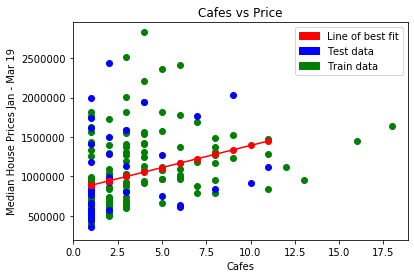

In [86]:
# Run linear regression on the train and test data
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
train_y_ = regr.predict(train_x)
test_y_ = regr.predict(test_x)

print('Train Data:')
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y - train_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y - train_y_) ** 2))
print("R2-score (train): %.2f" % r2_score(train_y , train_y_) )
print('  ')

print('Test Data:')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-score (test): %.2f" % r2_score(test_y , test_y_) )

plt.scatter(train_x, train_y,  color='green')
plt.scatter(test_x, test_y,  color='blue')
plt.scatter(test_x, test_y_, color='red' )
plt.plot(test_x, test_y_, color='red' )

red_patch = mpatches.Patch(color='red', label="Line of best fit")
green_patch = mpatches.Patch(color='green', label="Train data")
blue_patch = mpatches.Patch(color='blue', label="Test data")
plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.xlabel("Cafes")
plt.ylabel("Median House Prices Jan - Mar 19")
plt.title('Cafes vs Price')

Coefficients:  [[51862.10253474]]
Intercept:  [856349.50962959]
Mean absolute error: 336667.38
Residual sum of squares (MSE): 196861170375.21
R2-score: 0.11
  


Text(0.5, 1.0, 'Cafes vs Price')

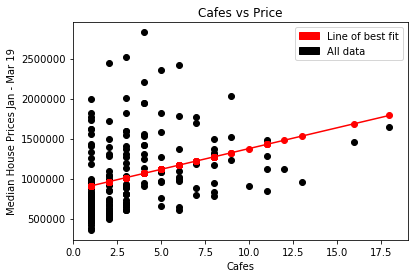

In [87]:
regr = linear_model.LinearRegression()
regr.fit (x, y)
y_ = regr.predict(x)

print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y - y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y - y_) ** 2))
print("R2-score: %.2f" % r2_score(y , y_) )
print('  ')


plt.scatter(x, y,  color='black')
plt.scatter(x, y_, color='red' )
plt.plot(x, y_, color='red' )

red_patch = mpatches.Patch(color='red', label="Line of best fit")
black_patch = mpatches.Patch(color='black', label="All data")
plt.legend(handles=[red_patch,black_patch])

plt.xlabel("Cafes")
plt.ylabel("Median House Prices Jan - Mar 19")
plt.title('Cafes vs Price')

# Number of Bakeries vs Price

In [88]:
park = venues[["Suburb","Venue Category","Venue"]]
park = park.groupby(["Suburb","Venue Category"]).count()
park.reset_index(inplace=True)
park = park[["Suburb","Venue"]][park["Venue Category"]=="Bakery"]
park.rename(columns={"Venue":"Number of Bakeries"},inplace=True)
park.reset_index(inplace=True, drop = True)
park=park.merge(df[["Suburb","Median House Prices Jan - Mar 18","Median House Prices Apr- Jun 18","Median House Prices Jul - Sep 18","Median House Prices Oct - Dec 18","Median House Prices Jan - Mar 19"]].set_index('Suburb'), on='Suburb')
park.sort_values(by = "Number of Bakeries", inplace = True)
park.head(5)

,Suburb,Number of Bakeries,Median House Prices Jan - Mar 18,Median House Prices Apr- Jun 18,Median House Prices Jul - Sep 18,Median House Prices Oct - Dec 18,Median House Prices Jan - Mar 19
0,ALBERT PARK,1,2070000,1950000.0,2212500.0,1832500.0,1690000.0
60,MERNDA,1,580000,590000.0,570000.0,555000.0,552500.0
59,MELTON WEST,1,450000,476000.0,437500.0,447500.0,420000.0
58,MEADOW HEIGHTS,1,510500,523000.0,507000.0,485000.0,470000.0
57,MCKINNON,1,1675000,1607500.0,1542500.0,1086000.0,1538000.0


In [89]:
msk = np.random.rand(len(park)) < 0.8

train = park[msk]
test = park[~msk]
print(train.shape)
print(test.shape)

#Split train and test
train_x = np.asanyarray(train[["Number of Bakeries"]])
train_y = np.asanyarray(train[["Median House Prices Jan - Mar 19"]])

test_x = np.asanyarray(test[["Number of Bakeries"]])
test_y = np.asanyarray(test[["Median House Prices Jan - Mar 19"]])

x = np.asanyarray(park[["Number of Bakeries"]])
y = np.asanyarray(park[["Median House Prices Jan - Mar 19"]])

(79, 7)
(12, 7)


Train Data:
Coefficients:  [[152496.3681592]]
Intercept:  [834527.6119403]
Mean absolute error: 367676.98
Residual sum of squares (MSE): 208640804286.73
R2-score (train): 0.03
  
Test Data:
Mean absolute error: 394610.17
Residual sum of squares (MSE): 188421013593.18
R2-score (test): -0.45


Text(0.5, 1.0, 'Bakeries vs Price')

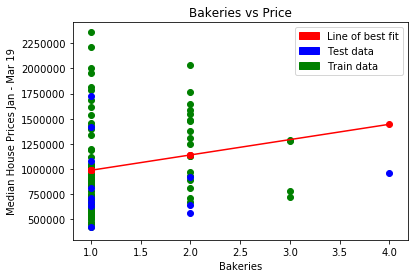

In [90]:
# Run linear regression on the train and test data
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
train_y_ = regr.predict(train_x)
test_y_ = regr.predict(test_x)

print('Train Data:')
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y - train_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y - train_y_) ** 2))
print("R2-score (train): %.2f" % r2_score(train_y , train_y_) )
print('  ')

print('Test Data:')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-score (test): %.2f" % r2_score(test_y , test_y_) )

plt.scatter(train_x, train_y,  color='green')
plt.scatter(test_x, test_y,  color='blue')
plt.scatter(test_x, test_y_, color='red' )
plt.plot(test_x, test_y_, color='red' )

red_patch = mpatches.Patch(color='red', label="Line of best fit")
green_patch = mpatches.Patch(color='green', label="Train data")
blue_patch = mpatches.Patch(color='blue', label="Test data")
plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.xlabel("Bakeries")
plt.ylabel("Median House Prices Jan - Mar 19")
plt.title('Bakeries vs Price')

# Number of Grocery Stores vs Price

In [91]:
gs = venues[["Suburb","Venue Category","Venue"]]
gs = gs.groupby(["Suburb","Venue Category"]).count()
gs.reset_index(inplace=True)
gs = gs[["Suburb","Venue"]][gs["Venue Category"]=="Grocery Store"]
gs.rename(columns={"Venue":"Number of Grocery Stores"},inplace=True)
gs.reset_index(inplace=True, drop = True)
gs=gs.merge(df[["Suburb","Median House Prices Jan - Mar 18","Median House Prices Apr- Jun 18","Median House Prices Jul - Sep 18","Median House Prices Oct - Dec 18","Median House Prices Jan - Mar 19"]].set_index('Suburb'), on='Suburb')
gs.sort_values(by = "Number of Grocery Stores", inplace = True)
gs.head(5)

,Suburb,Number of Grocery Stores,Median House Prices Jan - Mar 18,Median House Prices Apr- Jun 18,Median House Prices Jul - Sep 18,Median House Prices Oct - Dec 18,Median House Prices Jan - Mar 19
0,ABBOTSFORD,1,1220000,1135000.0,1205000.0,1185000.0,1015000.0
82,NARRE WARREN NORTH,1,1160000,1190000.0,1250000.0,1100000.0,1173000.0
81,NARRE WARREN,1,632000,625000.0,597500.0,593400.0,575000.0
80,MOUNT WAVERLEY,1,1431000,1370000.0,1286500.0,1196500.0,1205000.0
79,MOUNT ELIZA,1,1290000,1188500.0,1282500.0,1140000.0,1200000.0


In [92]:
msk = np.random.rand(len(gs)) < 0.8

train = gs[msk]
test = gs[~msk]
print(train.shape)
print(test.shape)

#Split train and test
train_x = np.asanyarray(train[["Number of Grocery Stores"]])
train_y = np.asanyarray(train[["Median House Prices Jan - Mar 19"]])

test_x = np.asanyarray(test[["Number of Grocery Stores"]])
test_y = np.asanyarray(test[["Median House Prices Jan - Mar 19"]])

x = np.asanyarray(gs[["Number of Grocery Stores"]])
y = np.asanyarray(gs[["Median House Prices Jan - Mar 19"]])

(89, 7)
(27, 7)


Train Data:
Coefficients:  [[184533.8762215]]
Intercept:  [681841.69381107]
Mean absolute error: 286416.68
Residual sum of squares (MSE): 194110764962.85
R2-score (train): 0.03
  
Test Data:
Mean absolute error: 316678.68
Residual sum of squares (MSE): 158697796484.30
R2-score (test): -0.02


Text(0.5, 1.0, 'Grocery Stores vs Price')

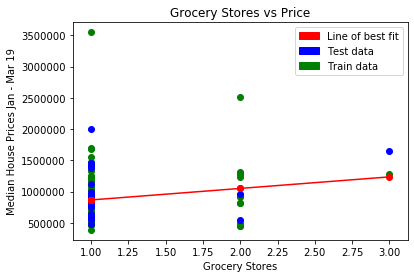

In [93]:
# Run linear regression on the train and test data
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
train_y_ = regr.predict(train_x)
test_y_ = regr.predict(test_x)

print('Train Data:')
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y - train_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y - train_y_) ** 2))
print("R2-score (train): %.2f" % r2_score(train_y , train_y_) )
print('  ')

print('Test Data:')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-score (test): %.2f" % r2_score(test_y , test_y_) )

plt.scatter(train_x, train_y,  color='green')
plt.scatter(test_x, test_y,  color='blue')
plt.scatter(test_x, test_y_, color='red' )
plt.plot(test_x, test_y_, color='red' )

red_patch = mpatches.Patch(color='red', label="Line of best fit")
green_patch = mpatches.Patch(color='green', label="Train data")
blue_patch = mpatches.Patch(color='blue', label="Test data")
plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.xlabel("Grocery Stores")
plt.ylabel("Median House Prices Jan - Mar 19")
plt.title('Grocery Stores vs Price')

# Clustering

In [94]:
import scipy
from sklearn import metrics
from scipy.spatial.distance import cdist

# import k-means from clustering stage
from sklearn.cluster import KMeans

1 0.4354740017700172
2 0.4194793198536527
3 0.41375128251721577
4 0.40244661933887804
5 0.3983087014540126
6 0.3936779754684025
7 0.38950407996467823
8 0.38327190926123555
9 0.379568000337282
10 0.3778492648637919


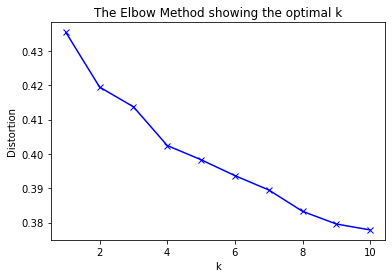

In [95]:
#Figure out the best value for K for K means clustering of the neighbourhoods with the elbow method


kinput = venuedumm.drop('Suburb', 1)                   
                     
distortions = []
K = range(1,11)
for k in K:
    kModel = KMeans(n_clusters=k,random_state=3).fit(kinput)
    D = sum(np.min(cdist(kinput, kModel.cluster_centers_, 'euclidean'), axis=1)) / kinput.shape[0]
    distortions.append(D)
    print(k,D)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

2 0.018429730998805016
3 0.027020198629050314
4 0.04250867531872623
5 0.047508155110982525
6 0.04754601413340009
7 0.0010298191274511872
8 0.00925517792881445
9 0.023040764894320682
10 0.02708815990562274


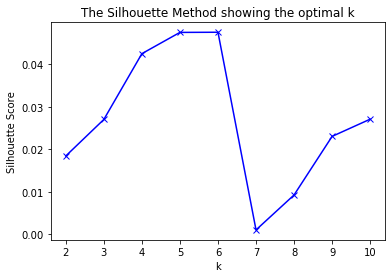

In [96]:
# No clear elbow so let's try the silhouette method

from sklearn.metrics import silhouette_score


sil = []
K2=range(2,11)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K2:
    kModel = KMeans(n_clusters = k,random_state=3).fit(kinput)
    labels = kModel.labels_
    s=silhouette_score(kinput, labels, metric = 'euclidean')
    sil.append(s)
    print(k,s)

    
# Plot the silhouette
plt.plot(K2, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

In [97]:
# We will set number of clusters at 6 as it's the global maximum for the silhouette
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=3).fit(kinput)
,
print(kmeans.labels_.shape)
kmeans.labels_

# add clustering labels
topX["Cluster"] = kmeans.labels_

# merge the grouped data with melbourne to add latitude/longitude for each neighborhood
df = df.join(topX.set_index('Suburb'), on='Suburb')

# Remove neighbourhoods with no venue data
df = df[np.isfinite(df["Cluster"])].reset_index(drop=True) # check the last columns!
df = df.astype({"Cluster": int})
print(df.shape)
df.head()

(364,)
(364, 25)


,Postcode,Latitude,Longitude,Suburb,Remoteness_Code,Remoteness_Name,RATIO,PERCENTAGE,Median House Prices Jan - Mar 18,Median House Prices Apr- Jun 18,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,3002,-37.816640,144.987811,EAST MELBOURNE,20,Major Cities of Australia,1.0,100.0,4268000,1680000.0,...,Breakfast Spot,Hotel,Thai Restaurant,Platform,Vegetarian / Vegan Restaurant,Train Station,Steakhouse,Stadium,Restaurant,3
1,3003,-37.806255,144.941123,WEST MELBOURNE,20,Major Cities of Australia,1.0,100.0,1326000,1400000.0,...,Train Station,Café,Bar,Bus Stop,Food Court,Theater,Wine Shop,NaN,NaN,3
2,3011,-37.808769,144.895486,SEDDON,20,Major Cities of Australia,1.0,100.0,1076000,1052000.0,...,Bakery,Chinese Restaurant,Dance Studio,Fish & Chips Shop,Gastropub,Grocery Store,Gym,Park,Pizza Place,4
3,3011,-37.799770,144.899587,FOOTSCRAY,20,Major Cities of Australia,1.0,100.0,931000,915000.0,...,Café,Asian Restaurant,Bar,Chinese Restaurant,Bakery,Coffee Shop,Platform,Sandwich Place,Beer Bar,3
4,3012,-37.814624,144.847108,BROOKLYN,20,Major Cities of Australia,1.0,100.0,700000,840000.0,...,Electronics Store,Food Truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [116]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'],df['Suburb'], df['Cluster']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [133]:
#Create a lookup with suburbs and clusters
clusterlookup = df[['Suburb',"Cluster"]].reset_index(drop = True).sort_values(by="Cluster")
clusterlookup

,Suburb,Cluster
181,MALVERN EAST,0
30,WYNDHAM VALE,0
223,DINGLEY VILLAGE,0
33,SEABROOK,0
218,NOTTING HILL,0
...,...,...
198,FERNTREE GULLY,5
74,DALLAS,5
201,SELBY,5
200,MENZIES CREEK,5


In [100]:
#Create a new dataframe with all onehot codes but also with clusters, using above lookup
venuedumm2 = pd.get_dummies(venues['Venue Category'])
venuedumm2['Suburb']=venues['Suburb']
venuedumm2=venuedumm2.join(clusterlookup.set_index('Suburb'), on='Suburb')

# Group it this time by clusters
venuedumm2 = venuedumm2.groupby("Cluster").mean().reset_index()
venuedumm2

,Cluster,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,0,0.000000,0.00000,0.000000,0.003378,0.000000,0.000000,0.003378,0.003378,0.013514,...,0.000000,0.016892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007463,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007463,0.000000,0.000000,0.000000,0.029851
2,2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.000710,0.00071,0.000355,0.002131,0.000355,0.000000,0.000710,0.001065,0.016335,...,0.003906,0.013139,0.000355,0.000355,0.001776,0.002131,0.000000,0.001065,0.001065,0.000000
4,4,0.003236,0.00000,0.000000,0.002157,0.000000,0.001079,0.000000,0.000000,0.006472,...,0.002157,0.002157,0.000000,0.000000,0.004315,0.006472,0.001079,0.000000,0.000000,0.000000
5,5,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000


In [131]:
#Examine the top (X) venue categories in each cluster

venues=venues.join(clusterlookup.set_index('Suburb'), on='Suburb')

num_top_venues = 7
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Cluster']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
topX2 = pd.DataFrame(columns=columns)
topX2['Cluster'] = venuedumm2['Cluster']

# Return up to the top X venue types for each cluster

#Loop for number of clusters
for ind in np.arange(venuedumm2.shape[0]): 
    #Create a dataframe which sorts venue types for each cluster from most common to least
    TOP2 = venues[venues["Cluster"]==venuedumm2.iloc[ind,0]].groupby("Venue Category").count().sort_values(by="Cluster",ascending=False).reset_index()[["Venue Category","Suburb"]]
    #figure out whether there are enough venue types for the cluster
    number = min(num_top_venues,TOP2.shape[0])
    #loop through and return the most common types
    for XX in range(0,number):
        topX2.iloc[ind, XX+1] =  TOP2.iloc[XX,0]
                
print(topX2.shape)
topX2 = topX2.transpose()
topX2.index.name = "Cluster"
topX2 = topX2[topX2.index!="Cluster"]
topX2

(6, 8)


,0,1,2,3,4,5
Cluster,,,,,,
1st Most Common Venue,Pizza Place,Park,Furniture / Home Store,Café,Café,Grocery Store
2nd Most Common Venue,Café,Café,NaN,Supermarket,Pizza Place,Train Station
3rd Most Common Venue,Grocery Store,Tennis Court,NaN,Fast Food Restaurant,Grocery Store,Bakery
4th Most Common Venue,Bakery,Zoo Exhibit,NaN,Bakery,Bakery,Burger Joint
5th Most Common Venue,Fast Food Restaurant,Construction & Landscaping,NaN,Grocery Store,Train Station,Coffee Shop
6th Most Common Venue,Fish & Chips Shop,Train Station,NaN,Coffee Shop,Supermarket,Doctor's Office
7th Most Common Venue,Thai Restaurant,Light Rail Station,NaN,Thai Restaurant,Pub,Memorial Site


In [134]:
#calculate the average distance from the Melbourne City for each cluster
clusterlookup=clusterlookup.merge(df[["Suburb","Distance to Melbourne"]].set_index("Suburb"),on="Suburb")
clusterdist = clusterlookup.groupby(by = "Cluster").mean().reset_index(drop=True)
clusterdist = clusterdist.transpose()
clusterdist.index.name = "Cluster"
clusterdist = clusterdist[clusterdist.index!="Cluster"]
clusterdist

,0,1,2,3,4,5
Cluster,,,,,,
Distance to Melbourne,24.768535,23.572191,26.113992,25.111721,21.26592,39.515993


In [111]:
clusterlookup[clusterlookup["Cluster"]==5]

,Suburb,Cluster,Distance to Melbourne
358,BELL PARK,5,64.657718
359,FERNTREE GULLY,5,30.158526
360,DALLAS,5,15.916638
361,SELBY,5,37.605886
362,MENZIES CREEK,5,40.450187
363,COCKATOO,5,48.307003


In [106]:
clusterexamine = venues[["Venue Category","Cluster","Suburb"]].groupby(["Cluster","Venue Category"]).count().sort_values(by="Suburb",ascending=False)
clusterexamine.rename(columns={"Suburb":"Count of Venues"},inplace=True)
clusterexamine.reset_index(inplace=True)
clusterexamine[clusterexamine["Cluster"]==5].head(15)

,Cluster,Venue Category,Count of Venues
104,5,Grocery Store,8
180,5,Train Station,4
342,5,Shopping Mall,1
347,5,Memorial Site,1
348,5,Restaurant,1
351,5,Pizza Place,1
385,5,Doctor's Office,1
389,5,Coffee Shop,1
393,5,Burger Joint,1
394,5,Bakery,1


In [114]:
#Name the clusters
clusternames = clusterlookup.groupby("Cluster").count().drop(columns=["Suburb","Distance to Melbourne"])
clusternames["Cluster"] = clusternames.index
clusternames=clusternames.reset_index(drop=True)
clusternames["Cluster Names"]=["Pizza and Food", "Parks and Nature","Other","Cafes and Shopping","Accessible Inner Suburbs","Accessible Outer Suburbs"]
clusternames

,Cluster,Cluster Names
0,0,Pizza and Food
1,1,Parks and Nature
2,2,Other
3,3,Cafes and Shopping
4,4,Accessible Inner Suburbs
5,5,Accessible Outer Suburbs
